In [107]:
import tensorflow as tf
from tensorflow import keras


import generator_model
import generator_model2
import generator_model3
import generator_model4
import discriminator_model
import discriminator_model2
import GAN_model
import Callbacks

In [2]:
import math
import pickle
import glob
from pathlib import Path

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from AnnotationData import AnnotationData
%load_ext autoreload
%autoreload 2

In [4]:
folder = "D:/FER/IstrazivackiSeminar"
backgrounds_path = "D:/FER/IstrazivackiSeminar/empty_labels/"
batch_size = 32
image_size = (128,128)

In [5]:
def loadAnnotation(input_folder):
    data = []
    paths = glob.glob(input_folder + "/**/*.pkl", recursive=True)
    for path in paths:
        with open(path, "rb") as file:
            annotations = pickle.load(file)
        annotationsArray = [(str(Path(path).parent) + "\\" + name, ant) for (name, ant) in annotations]
        data += annotationsArray
    return data

In [6]:
annotation = loadAnnotation(folder)

In [7]:
class GAN_Dataset(keras.utils.Sequence):
    def __init__(self, data, batch_size, image_size, backgrounds_path):
        self.image_size = image_size
        self.data = data
        self.batch_size = batch_size
        self.backgrounds_path = backgrounds_path
        self.bacgrounds = np.array([self.loadImage(path) for path in glob.glob(self.backgrounds_path +"/*")])

    def __len__(self):
        return math.ceil(len(self.data) / self.batch_size) - 1

    def __getitem__(self, idx):
        images = np.array([self.loadImage(name) for (name, ant) in self.data[idx * self.batch_size: (idx + 1) * self.batch_size]])
        annotation = np.array([np.expand_dims(ant.astype(np.float32), -1) for (name, ant) in self.data[idx * self.batch_size: (idx + 1) * self.batch_size]])
        bg_indices = np.random.choice(self.bacgrounds.shape[0], images.shape[0])
        bg = self.bacgrounds[bg_indices]
        return images, annotation, bg
            
    def loadImage(self, path):
        img = Image.open(path).resize(self.image_size)
        img = np.array(img, dtype=np.float32) / 255
        return np.expand_dims(img, -1)
 

In [8]:
dataset = GAN_Dataset(annotation, batch_size, image_size, backgrounds_path)

In [9]:
len(dataset)

54

In [22]:
dataset[54][0].shape

(0,)

In [177]:
generator = generator_model4.model(image_size, 1,1, concat_channels=[128, 128, 128, 3], channels=[16, 16, 32, 64, 128, 128])
generator.summary()

Model: "Generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_175 (InputLayer)          [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
input_176 (InputLayer)          [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
concatenate_182 (Concatenate)   (None, 10, 10, 2)    0           input_175[0][0]                  
                                                                 input_176[0][0]                  
__________________________________________________________________________________________________
conv2d_transpose_282 (Conv2DTra (None, 16, 16, 128)  12672       concatenate_182[0][0]    

In [178]:
discriminator = discriminator_model2.model(image_size, 1, channels=[64,64,64], up_channels=[128, 128, 3])
discriminator.summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_177 (InputLayer)          [(None, 10, 10, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_transpose_286 (Conv2DTra (None, 16, 16, 128)  6400        input_177[0][0]                  
__________________________________________________________________________________________________
conv2d_transpose_287 (Conv2DTra (None, 64, 64, 128)  147584      conv2d_transpose_286[0][0]       
__________________________________________________________________________________________________
conv2d_transpose_288 (Conv2DTra (None, 128, 128, 3)  3459        conv2d_transpose_287[0][0]       
______________________________________________________________________________________

In [164]:
showCallbacks = Callbacks.ShowGeneratedImages(dataset)

In [179]:
cond_gan = GAN_model.GAN_model(
    discriminator=discriminator, generator=generator, batch_size = batch_size, label_size = (10,10), num_gen_per_dis=2, dicriminator_ouput=(8,8)
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(),
)



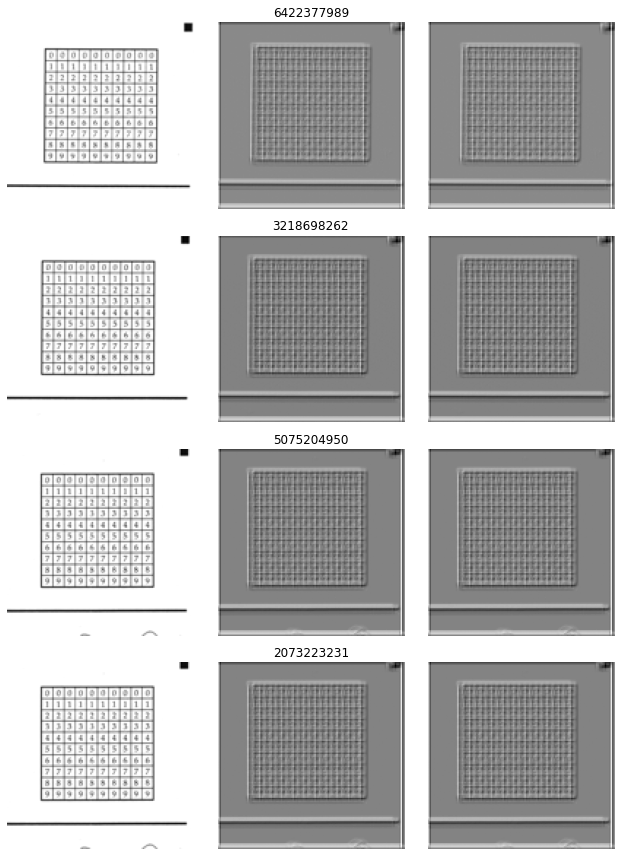

Epoch 1/20
53/53 [==============================] - 22s 345ms/step - g_loss: 0.6243 - d_loss: 0.6870


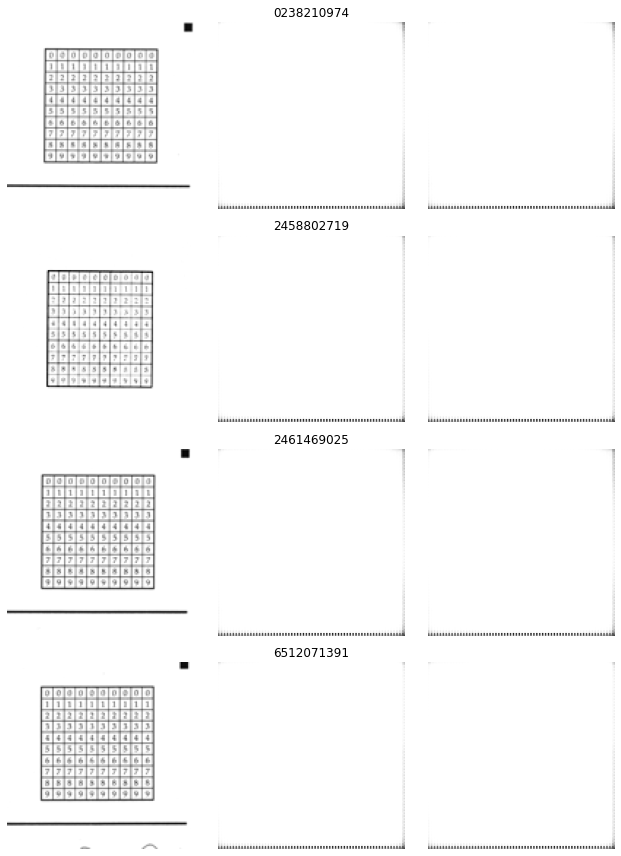

Epoch 2/20
53/53 [==============================] - 19s 360ms/step - g_loss: 0.9264 - d_loss: 0.6347


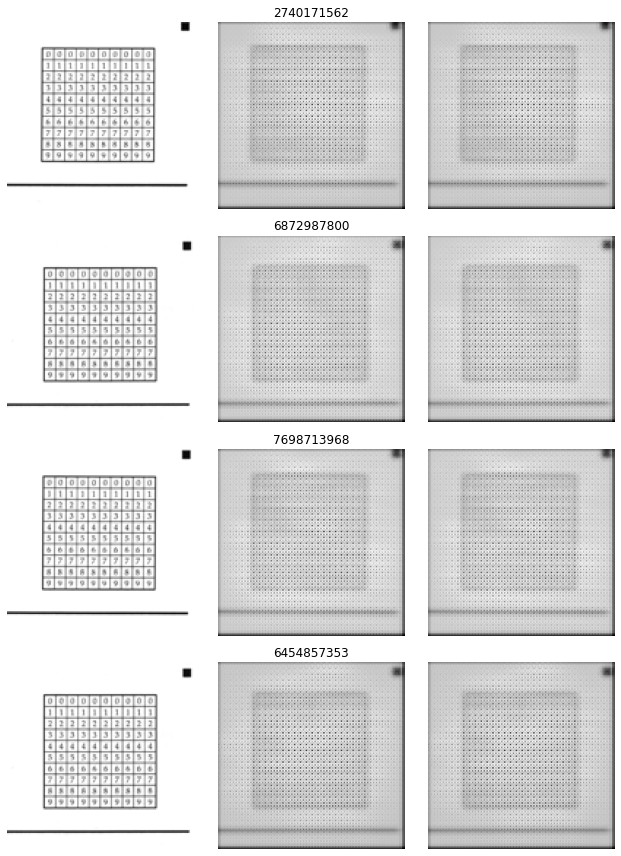

Epoch 3/20
53/53 [==============================] - 19s 352ms/step - g_loss: 0.8198 - d_loss: 1.0814


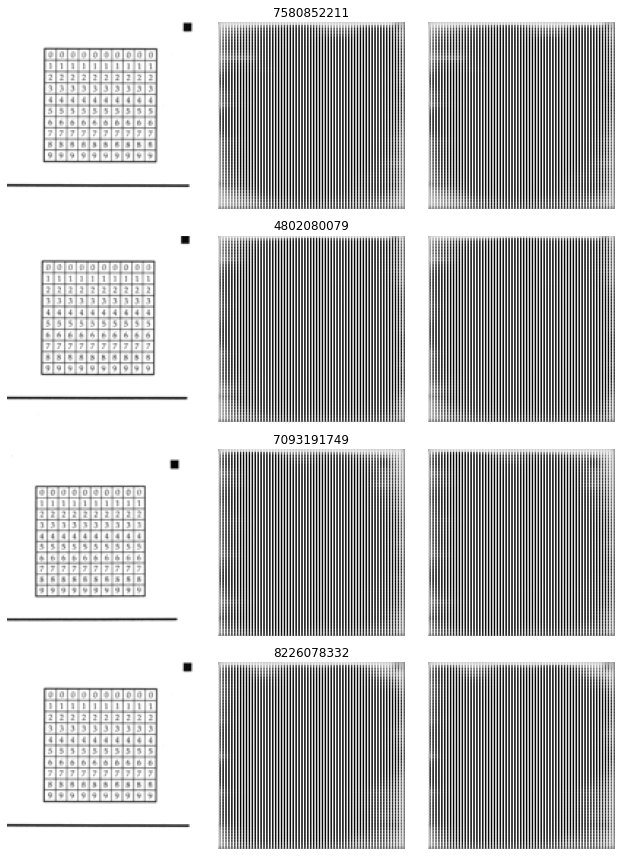

Epoch 4/20
53/53 [==============================] - 19s 352ms/step - g_loss: 1.1962 - d_loss: 0.5398


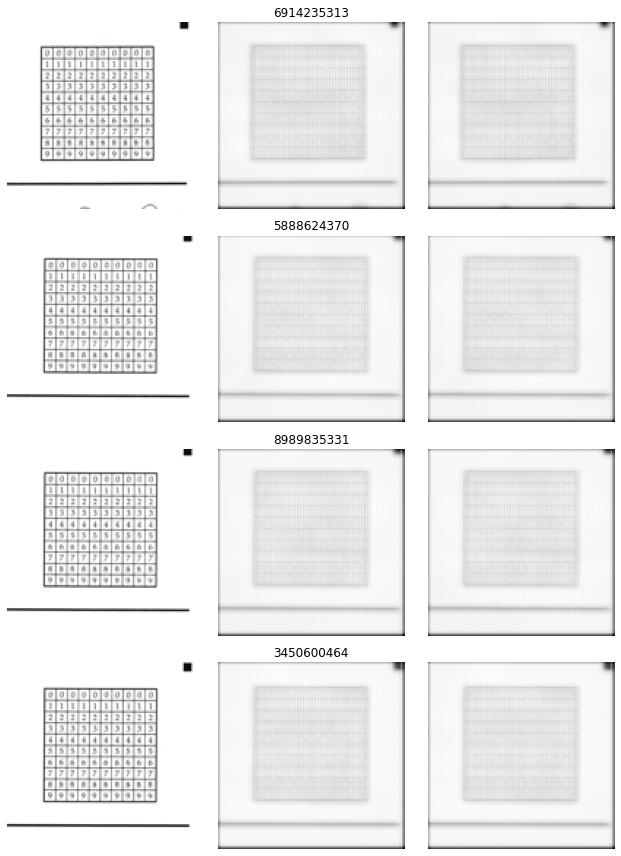

Epoch 5/20
53/53 [==============================] - 19s 361ms/step - g_loss: 0.6100 - d_loss: 0.7628


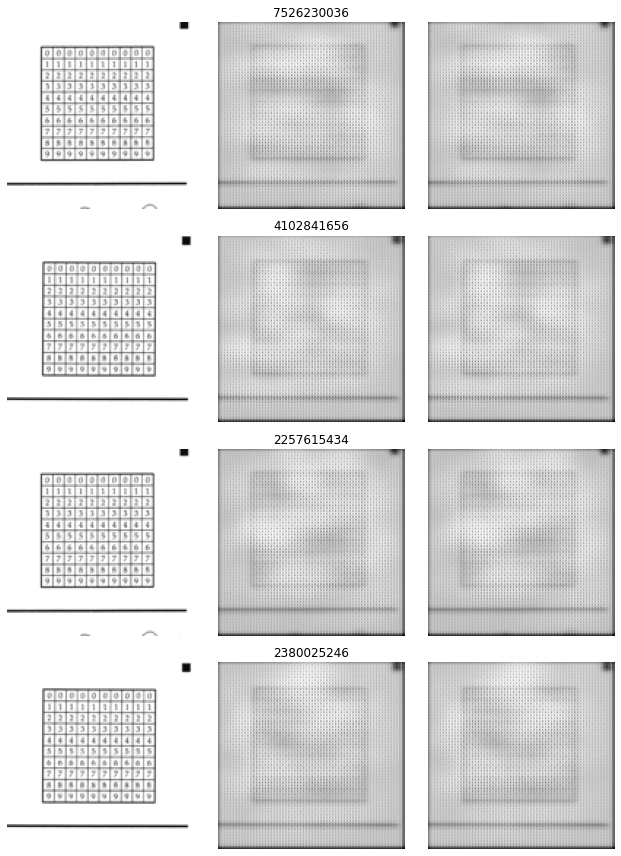

Epoch 6/20
53/53 [==============================] - 19s 348ms/step - g_loss: 0.8643 - d_loss: 0.6531


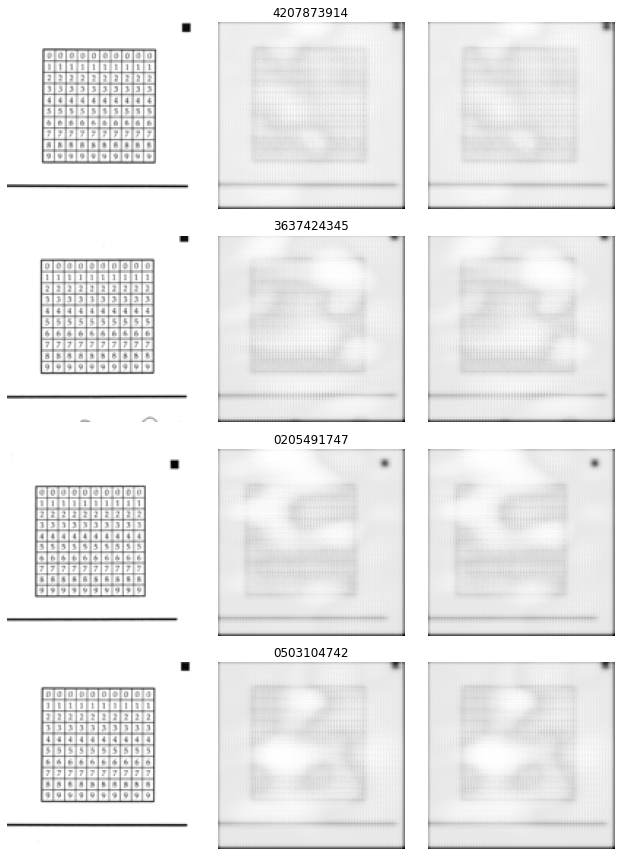

Epoch 7/20
53/53 [==============================] - 19s 354ms/step - g_loss: 0.8291 - d_loss: 0.6663


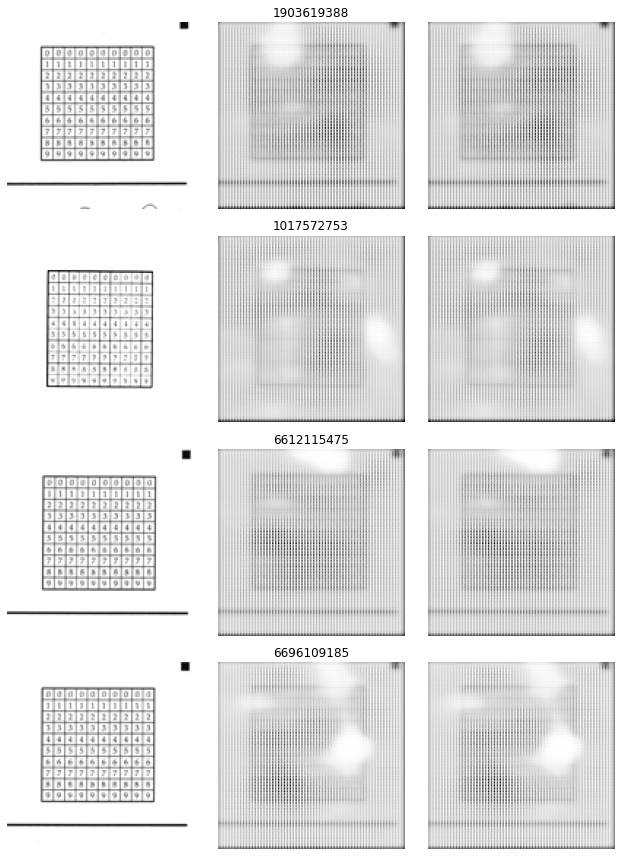

Epoch 8/20
53/53 [==============================] - 19s 362ms/step - g_loss: 0.7229 - d_loss: 0.7079


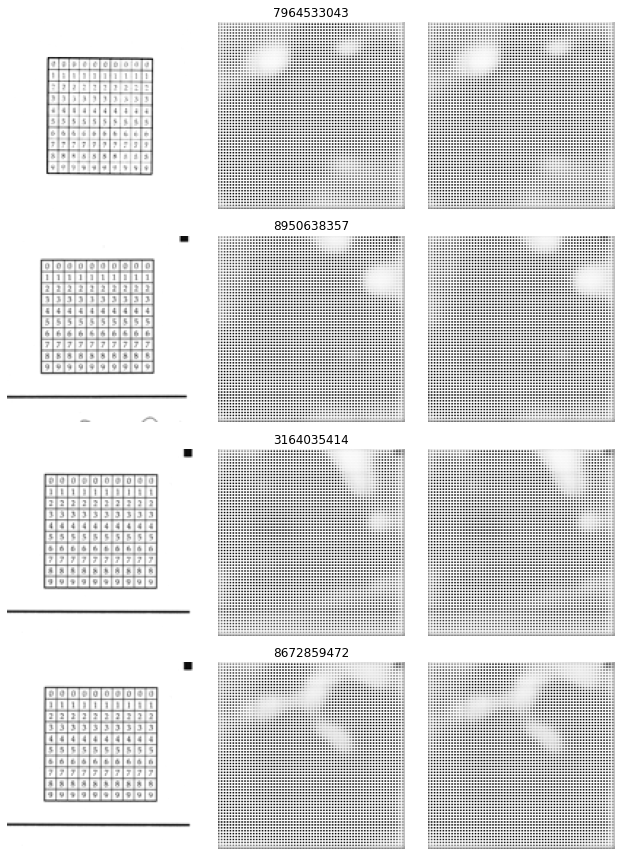

Epoch 9/20
53/53 [==============================] - 19s 348ms/step - g_loss: 0.9271 - d_loss: 0.5979


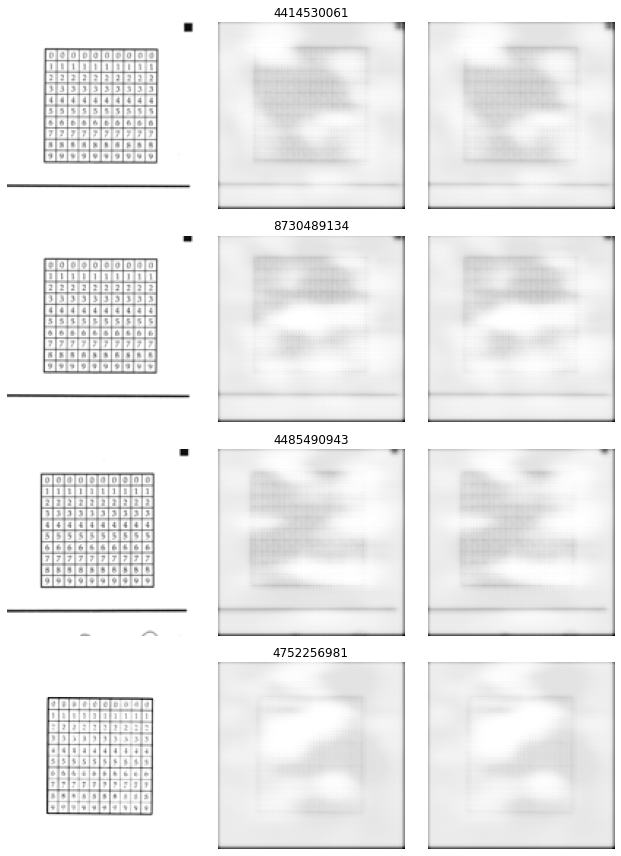

Epoch 10/20
53/53 [==============================] - 18s 334ms/step - g_loss: 0.9165 - d_loss: 0.6412


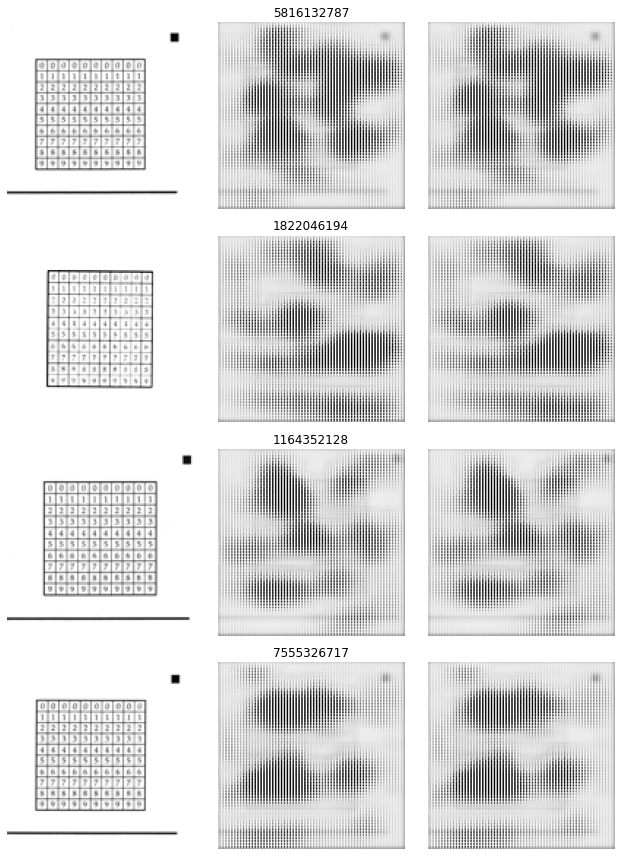

Epoch 11/20
53/53 [==============================] - 18s 338ms/step - g_loss: 1.0686 - d_loss: 0.6113


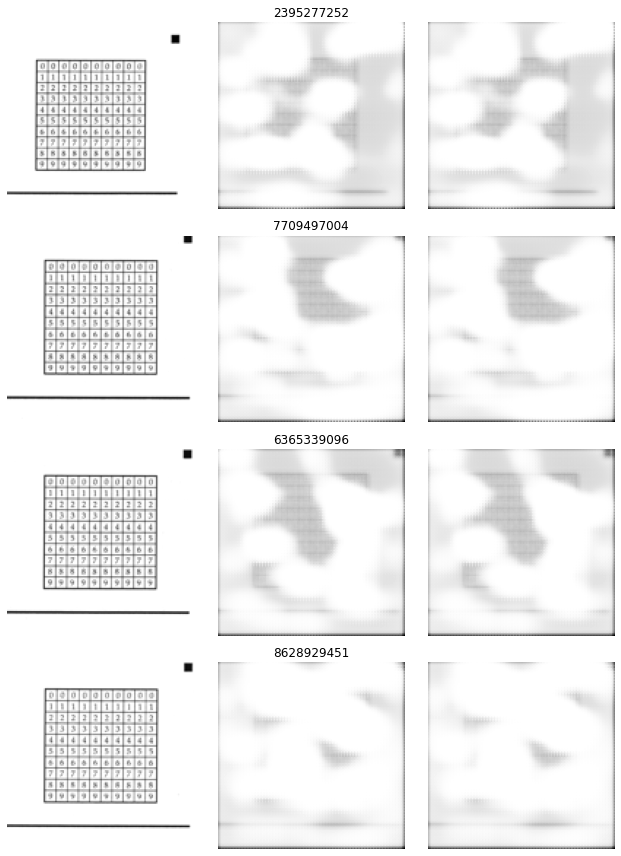

Epoch 12/20
53/53 [==============================] - 18s 339ms/step - g_loss: 1.3730 - d_loss: 0.5334


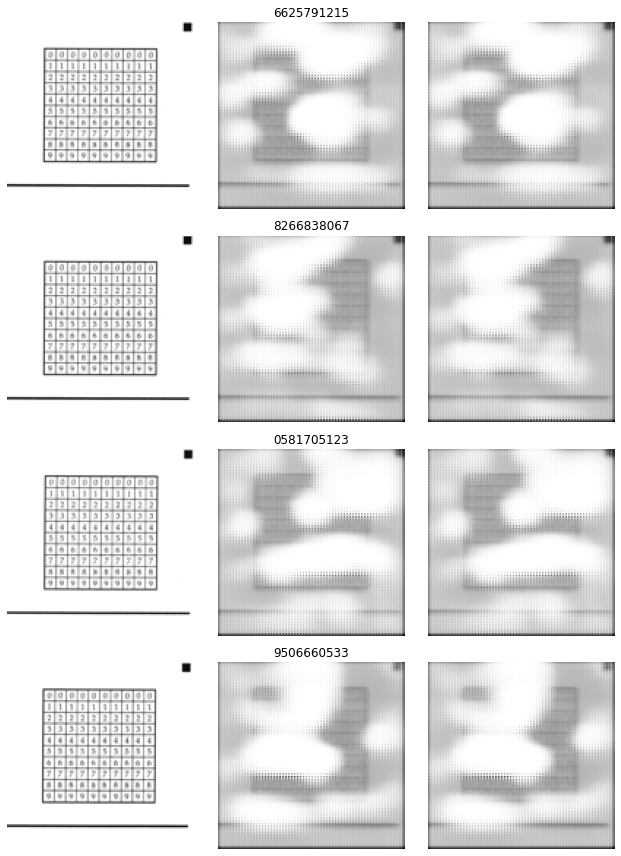

Epoch 13/20
53/53 [==============================] - 18s 339ms/step - g_loss: 1.3188 - d_loss: 0.5432


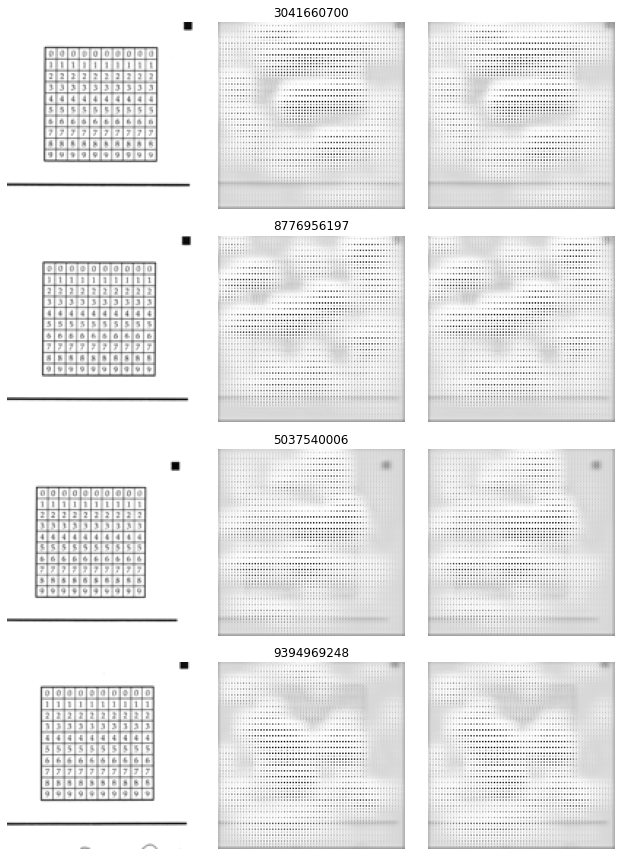

Epoch 14/20
53/53 [==============================] - 18s 341ms/step - g_loss: 1.4890 - d_loss: 0.5272


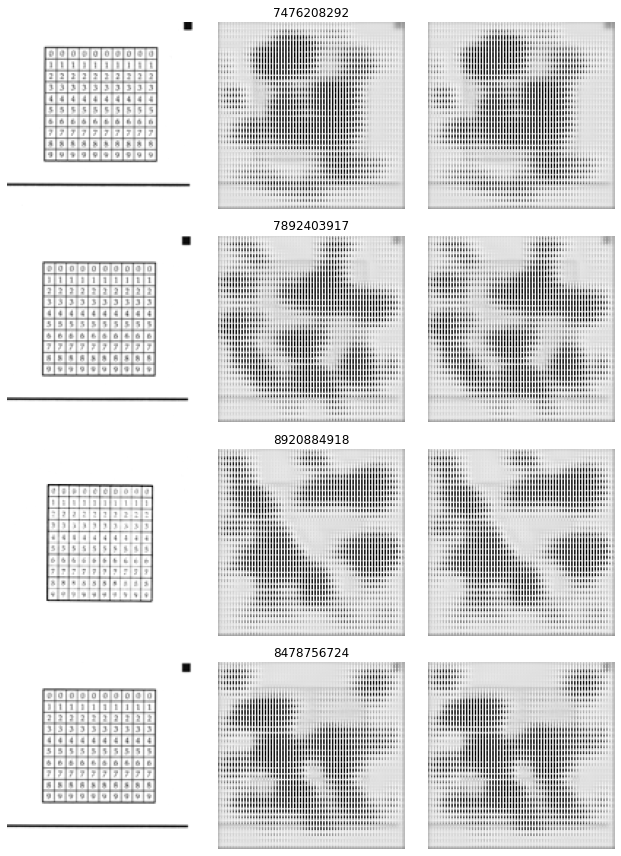

Epoch 15/20
53/53 [==============================] - 18s 340ms/step - g_loss: 1.4474 - d_loss: 0.4908


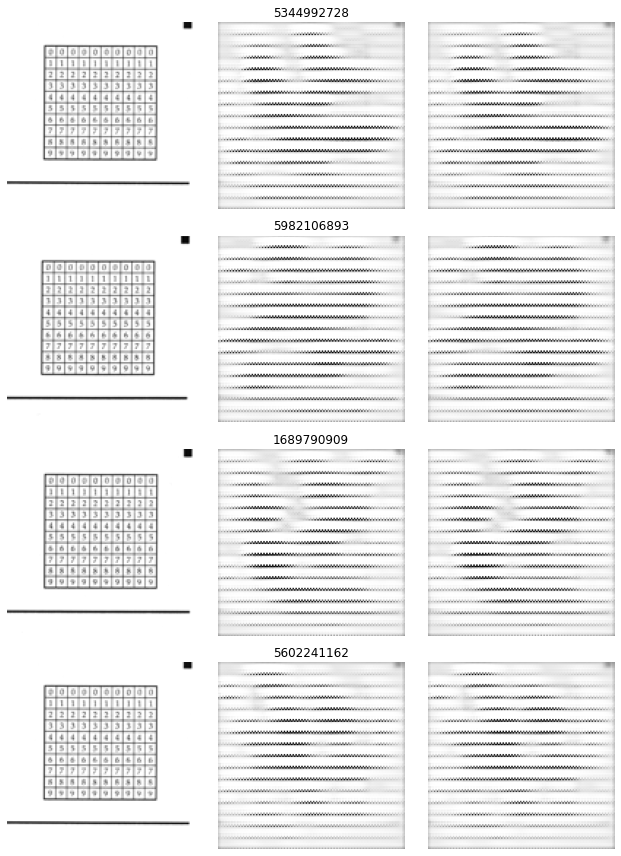

Epoch 16/20
53/53 [==============================] - 19s 358ms/step - g_loss: 1.7065 - d_loss: 0.5103


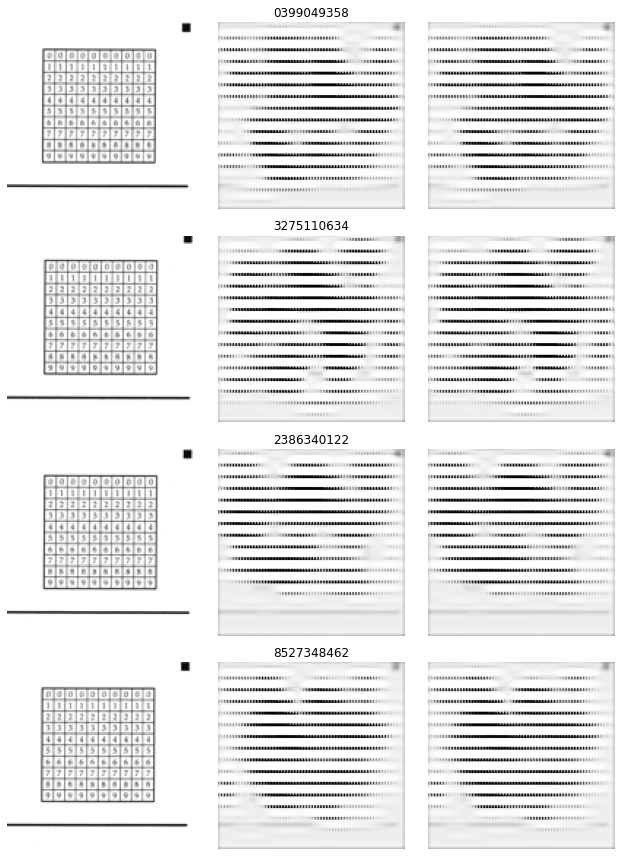

Epoch 17/20
53/53 [==============================] - 20s 363ms/step - g_loss: 1.6945 - d_loss: 0.4541


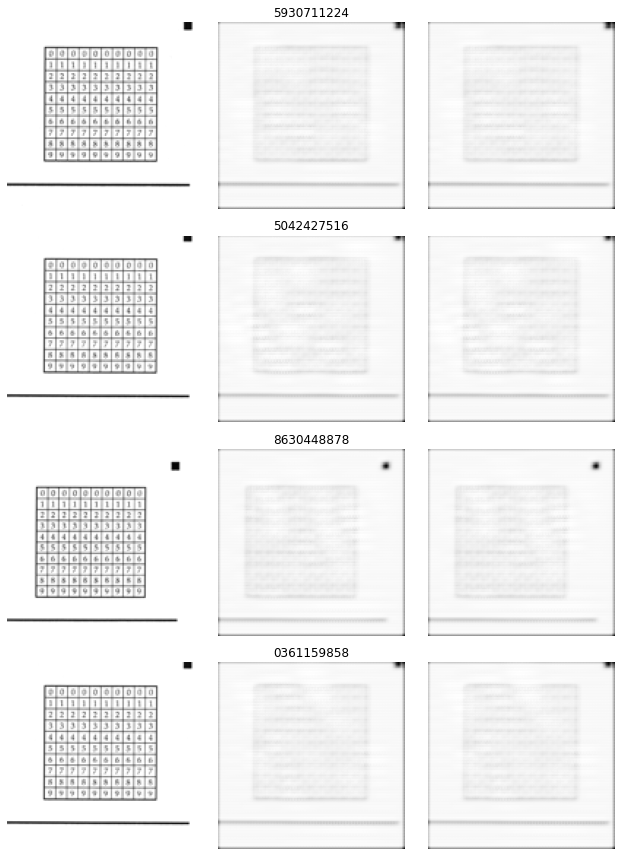

Epoch 18/20
53/53 [==============================] - 19s 347ms/step - g_loss: 1.7448 - d_loss: 0.4527


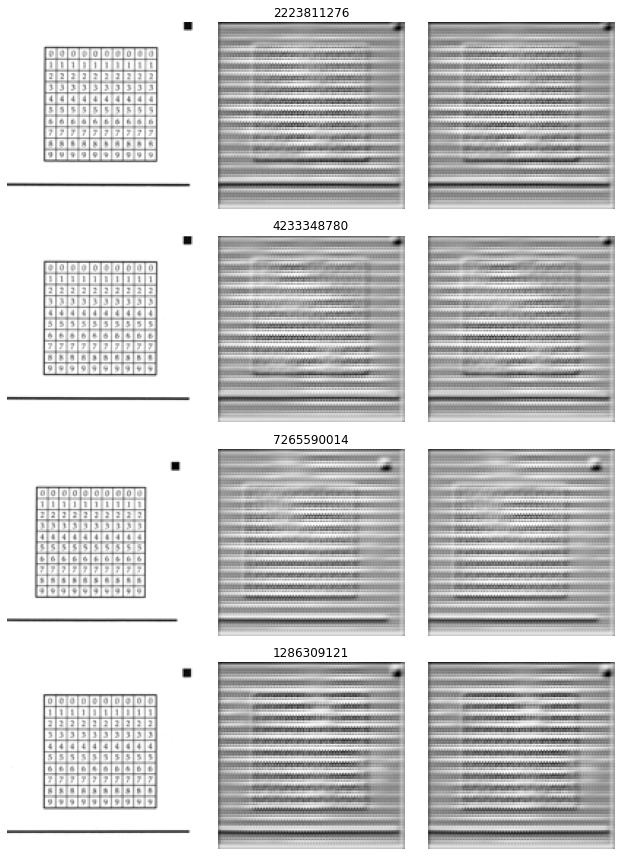

Epoch 19/20
53/53 [==============================] - 18s 338ms/step - g_loss: 1.5737 - d_loss: 0.5204


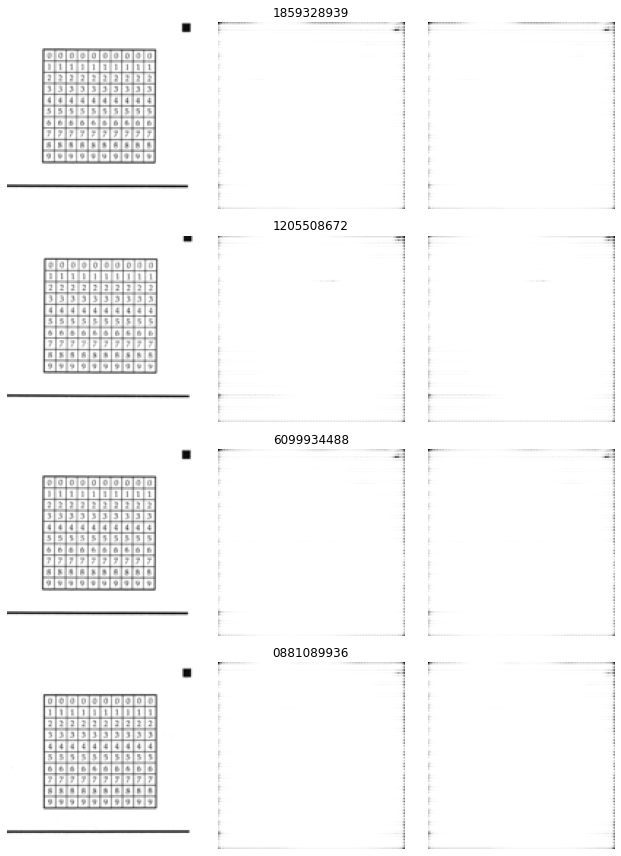

Epoch 20/20
53/53 [==============================] - 18s 340ms/step - g_loss: 1.7840 - d_loss: 0.4353


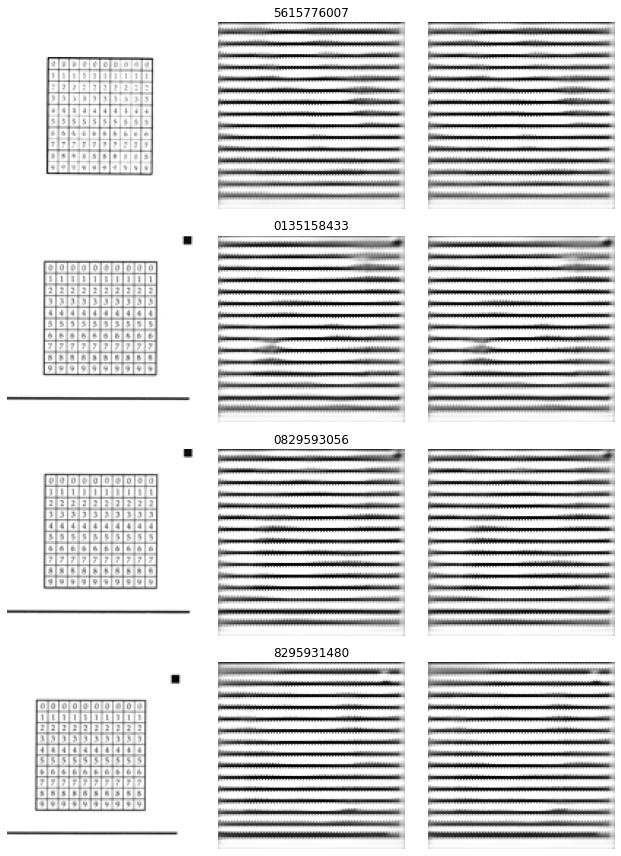

In [181]:
cond_gan.fit(dataset, epochs=20, callbacks=[showCallbacks])